In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("cm1out_000001.nc")

An approximation to the gradient Richardson number formed by approximating local gradients by finite difference across layers.

The bulk Richardson number RB is
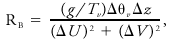
where g is gravitational acceleration, Tv is absolute virtual temperature, Δθv is the virtual potential temperature difference across a layer of thickness Δz, and ΔU and ΔV are the changes in horizontal wind components across that same layer. In the limit of layer thickness becoming small, the bulk Richardson number approaches the gradient Richardson number, for which a critical Richardson number is roughly Ric = 0.25. Gradient Richardson numbers less than this critical value are dynamically unstable and likely to become or remain turbulent. Unfortunately, a critical value is not well defined for the bulk Richardson number, leading to uncertainty in turbulence likelihood for values near the critical value.

It is used as a convenient surrogate for density in buoyancy calculations. The virtual potential temperature θv is defined by

where θ is the actual potential temperature, r is the mixing ratio of water vapor, and rL is the mixing ratio of liquid water in the air. Temperatures must be in units of Kelvin, and mixing ratios in units of gwater/gdry air. Because water vapor is less dense than dry air, humid air has a warmer θv than dry air. Liquid water droplets, if falling at their terminal velocity in air, make the air heavier and are associated with colder θv. For saturated or cloudy air, use saturation mixing ratio in place of r, while for unsaturated air, use rL = 0.

The virtual temperature Tv = T(1 + rv/ ε)/(1 + rv), where rv is the mixing ratio and ε is the ratio of the gas constants of air and water vapor, ≈ 0.622.

The height of the ABL is estimated by a bulk Richardson
number approach. The bulk Richardson number at height z
above ground is given by the following expression

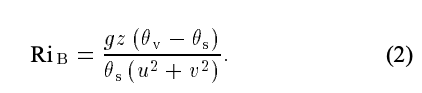


The quantities s and v are the virtual potential temperature
at the surface and at height z, respectively; u and v are the
horizontal wind components at height z; and g is the gravitational acceleration. The top of the ABL is given by the
height, h, at which the bulk Richardson number reaches a
critical value

In [3]:
def Rb(z,theta_v,theta_s,u,v):
    g = 9.81
    rb = (g*z*(theta_v-theta_s))/(theta_s*(u**2+v**2))
    return rb

In [4]:
ds.zh.values[(ds.zh.values>=0.24)&(ds.zh.values<=0.25)]

array([0.24666668], dtype=float32)

In [5]:
np.where(ds.zh.values==0.24666668)

(array([24]),)

In [6]:
def theta_v(theta,r,rL):
    return theta*(1+(0.61*r)-rL)

In [8]:
vpt = theta_v(ds.th,ds.qv,ds.qr)
vpt

<xarray.DataArray (time: 1, zh: 175, yh: 256, xh: 512)>
array([[[[302.27713, 302.60553, 302.52844, ..., 302.1452 , 302.37558,
          302.1915 ],
         [302.22516, 302.40732, 302.50888, ..., 302.1861 , 302.29727,
          302.62686],
         [302.5686 , 302.3584 , 302.35983, ..., 302.51437, 302.41394,
          302.4418 ],
         ...,
         [302.54013, 302.53293, 302.543  , ..., 302.6144 , 302.35202,
          302.1558 ],
         [302.61865, 302.60178, 302.26312, ..., 302.22073, 302.56   ,
          302.44855],
         [302.4149 , 302.30753, 302.21622, ..., 302.51755, 302.32602,
          302.35974]],

        [[302.18826, 302.38498, 302.62054, ..., 302.31918, 302.19   ,
          302.52325],
         [302.55795, 302.39725, 302.38254, ..., 302.4516 , 302.2615 ,
          302.3259 ],
         [302.16864, 302.61053, 302.24762, ..., 302.57553, 302.62543,
          302.5151 ],
...
         [312.19885, 312.28357, 312.29916, ..., 312.06967, 312.17422,
          311.90433],
         [311.9443 , 312.21597, 311.86624, ..., 312.01346, 311.9743 ,
          312.00626],
         [312.24576, 312.26874, 312.22073, ..., 312.22684, 312.09225,
          312.04745]],

        [[312.3258 , 312.05225, 312.04254, ..., 312.13495, 312.33612,
          312.38712],
         [312.17224, 312.31927, 311.97968, ..., 312.2398 , 312.44073,
          312.01733],
         [311.9674 , 312.28647, 312.43   , ..., 312.15695, 312.1896 ,
          312.1275 ],
         ...,
         [312.1878 , 312.14337, 312.31525, ..., 312.05478, 312.36514,
          312.20267],
         [312.00656, 312.26437, 311.94223, ..., 311.96606, 312.02237,
          312.16092],
         [312.19666, 312.22675, 312.3624 , ..., 312.3858 , 312.01163,
          312.16577]]]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00
  * xh       (xh) float32 -10.22 -10.18 -10.14 -10.1 ... 10.1 10.14 10.18 10.22
  * yh       (yh) float32 -5.1 -5.06 -5.02 -4.98 -4.94 ... 4.98 5.02 5.06 5.1
  * zh       (zh) float32 0.004 0.012 0.02 0.028 0.036 ... 4.86 4.9 4.94 4.98

In [ ]:
ric_num = Rb(z=0.24666668, theta_v = vpt[0,24], theta_s=vpt[0,0], u = ds.u[0,24],v=ds.v[0,24])